<font size=6><b>유가증권 수익율 계산

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import dates as mdates
import matplotlib.pyplot as plt

import pandas_datareader as pdr
import FinanceDataReader as fdr
from pykrx import stock

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)


In [2]:
def codefind(name):
    krx = fdr.StockListing('KRX')
    search = list(krx['Name'])
    for i in range(len(krx)):
        if (search[i]==name):
            print(krx['Symbol'][i])
            return
codefind('카카오')        

035720


# OHLCV Data Load
* yahoo finance를 이용한 삼성전자 주식 가져오기

In [3]:
df_ss = pdr.get_data_yahoo('005930.KS', '2018-01-01', '2019-12-31')

In [4]:
df_ss.info()
df_ss.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 490 entries, 2018-01-02 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       490 non-null    float64
 1   Low        490 non-null    float64
 2   Open       490 non-null    float64
 3   Close      490 non-null    float64
 4   Volume     490 non-null    float64
 5   Adj Close  490 non-null    float64
dtypes: float64(6)
memory usage: 26.8 KB


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,51400.0,50780.0,51380.0,51020.0,8474250.0,45077.804688
2018-01-03,52560.0,51420.0,52540.0,51620.0,10013500.0,45607.914062
2018-01-04,52180.0,50640.0,52120.0,51080.0,11695450.0,45130.820312
2018-01-05,52120.0,51200.0,51300.0,52120.0,9481150.0,46049.683594
2018-01-08,52520.0,51500.0,52400.0,52020.0,8383650.0,45961.335938


In [5]:
df_ss.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

* 종가 그데로 출력하면 다른 상품 가격과 비교하기 힘들다

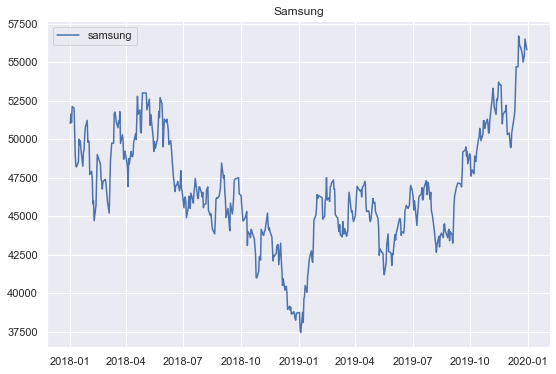

In [6]:
plt.figure(figsize=(9, 6))
# plt.subplot(2, 1, 1)
plt.title('Samsung')
plt.plot(df_ss.index, df_ss['Close'], label='samsung')
plt.legend()


# 일간 변동가 / 변동률

## 변동지수_가격

In [7]:
last_day = df_ss['Close'].shift(1)
today = df_ss['Close']

df_ss['var_daily_price'] = today - last_day                      # 변동가
df_ss['var_daily_ratio'] = ((today - last_day)/last_day) *100    # 변동율

df_ss.head()


,High,Low,Open,Close,Volume,Adj Close,var_daily_price,var_daily_ratio
Date,,,,,,,,
2018-01-02,51400.0,50780.0,51380.0,51020.0,8474250.0,45077.804688,NaN,NaN
2018-01-03,52560.0,51420.0,52540.0,51620.0,10013500.0,45607.914062,600.0,1.176009
2018-01-04,52180.0,50640.0,52120.0,51080.0,11695450.0,45130.820312,-540.0,-1.046106
2018-01-05,52120.0,51200.0,51300.0,52120.0,9481150.0,46049.683594,1040.0,2.036022
2018-01-08,52520.0,51500.0,52400.0,52020.0,8383650.0,45961.335938,-100.0,-0.191865


## 변동계수
* 서로 다른 두 자산이 비슷하게 움직이는지 다른 방향으로 움직이는지 알려주는 지표
* 변동계수 = 𝜎(자산수익률의 표준편차) / 자산의 평균(기대)수익률

In [8]:
df_ss.head()

,High,Low,Open,Close,Volume,Adj Close,var_daily_price,var_daily_ratio
Date,,,,,,,,
2018-01-02,51400.0,50780.0,51380.0,51020.0,8474250.0,45077.804688,NaN,NaN
2018-01-03,52560.0,51420.0,52540.0,51620.0,10013500.0,45607.914062,600.0,1.176009
2018-01-04,52180.0,50640.0,52120.0,51080.0,11695450.0,45130.820312,-540.0,-1.046106
2018-01-05,52120.0,51200.0,51300.0,52120.0,9481150.0,46049.683594,1040.0,2.036022
2018-01-08,52520.0,51500.0,52400.0,52020.0,8383650.0,45961.335938,-100.0,-0.191865


In [9]:
변동계수 = df_ss['var_daily_ratio'].std() / df_ss['var_daily_ratio'].mean()
변동계수

51.35249020430333

               High       Low      Open     Close    Volume  Adj Close  \
Close      0.992806  0.994409  0.985507  1.000000  0.067093   0.970963   
Low        0.993589  1.000000  0.993858  0.994409  0.050810   0.967541   
High       1.000000  0.993589  0.993187  0.992806  0.115526   0.959696   
Open       0.993187  0.993858  1.000000  0.985507  0.076213   0.954788   
Adj Close  0.959696  0.967541  0.954788  0.970963  0.013101   1.000000   

           var_daily_price  var_daily_ratio  
Close             0.126747         0.123115  
Low               0.060805         0.057359  
High              0.054944         0.052464  
Open              0.001946        -0.000263  
Adj Close         0.137663         0.133013  


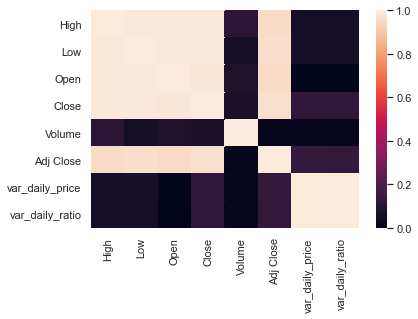

In [10]:
import seaborn as sns
sns.heatmap(df_ss.corr())
print(df_ss.corr().sort_values(by='Close', ascending=False)[:5])

In [11]:
df_ss.head()

,High,Low,Open,Close,Volume,Adj Close,var_daily_price,var_daily_ratio
Date,,,,,,,,
2018-01-02,51400.0,50780.0,51380.0,51020.0,8474250.0,45077.804688,NaN,NaN
2018-01-03,52560.0,51420.0,52540.0,51620.0,10013500.0,45607.914062,600.0,1.176009
2018-01-04,52180.0,50640.0,52120.0,51080.0,11695450.0,45130.820312,-540.0,-1.046106
2018-01-05,52120.0,51200.0,51300.0,52120.0,9481150.0,46049.683594,1040.0,2.036022
2018-01-08,52520.0,51500.0,52400.0,52020.0,8383650.0,45961.335938,-100.0,-0.191865


## 일간변동률 누적합 .cumsum()

In [12]:
df_ss['var_daily_ratio'].cumsum()[:5]

Date
2018-01-02         NaN
2018-01-03    1.176009
2018-01-04    0.129903
2018-01-05    2.165925
2018-01-08    1.974060
Name: var_daily_ratio, dtype: float64

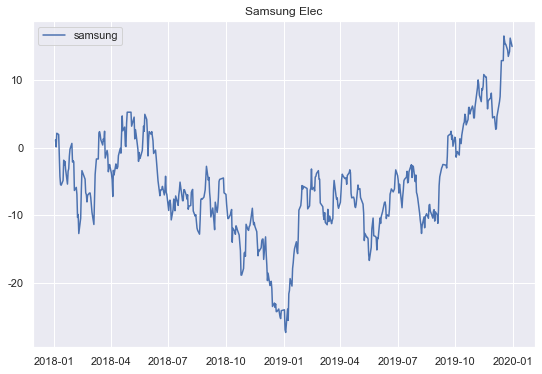

In [13]:
plt.figure(figsize=(9, 6))
# plt.subplot(2, 1, 1)
plt.title('Samsung Elec')
plt.plot(df_ss.index, df_ss['var_daily_ratio'].cumsum(), label='samsung')
plt.legend()


# 이동평균선(이평선)
* N일의 주가지수의 평균 변동률
* 이동평균선 (N일 동안의 주가의 평균 변동률을 이은 선)

In [14]:
def 이동편균선(day=1):
    df_ss['dayline_'+str(day)] = df_ss['Close'].rolling(day).mean()

In [15]:
df_ss.head()

,High,Low,Open,Close,Volume,Adj Close,var_daily_price,var_daily_ratio
Date,,,,,,,,
2018-01-02,51400.0,50780.0,51380.0,51020.0,8474250.0,45077.804688,NaN,NaN
2018-01-03,52560.0,51420.0,52540.0,51620.0,10013500.0,45607.914062,600.0,1.176009
2018-01-04,52180.0,50640.0,52120.0,51080.0,11695450.0,45130.820312,-540.0,-1.046106
2018-01-05,52120.0,51200.0,51300.0,52120.0,9481150.0,46049.683594,1040.0,2.036022
2018-01-08,52520.0,51500.0,52400.0,52020.0,8383650.0,45961.335938,-100.0,-0.191865


In [16]:
이동편균선(10)
이동편균선(5)
# myplot(df_ss[['Close','dayline_5','dayline_10']], title='이동평균선', labels=['Close','5일선','10일선'])
# myplot(df_ss.iloc[:100][['Close','dayline_5','dayline_10']], title='이동평균선', labels=['Close','5일선','10일선'])

* 이평선은 변동성이 완화된 것처럼 보인다

# 수익률 구하기 
* 가격의 변동을 보고 오늘 기준으로 N일과 비교해서 가감산 금액 구하기

In [17]:
def 변동지수_가격(day=1):
    df_ss['chg_'+str(day)] = df_ss['Close'].pct_change(periods=day) * 100     

In [18]:
변동지수_가격(3)
df_ss.head()
# myplot(df_ss.iloc[:100][['Close']], title='변동가(지수)---N일 이익률', labels=['Close'])

,High,Low,Open,Close,Volume,Adj Close,var_daily_price,var_daily_ratio,dayline_10,dayline_5,chg_3
Date,,,,,,,,,,,
2018-01-02,51400.0,50780.0,51380.0,51020.0,8474250.0,45077.804688,NaN,NaN,NaN,NaN,NaN
2018-01-03,52560.0,51420.0,52540.0,51620.0,10013500.0,45607.914062,600.0,1.176009,NaN,NaN,NaN
2018-01-04,52180.0,50640.0,52120.0,51080.0,11695450.0,45130.820312,-540.0,-1.046106,NaN,NaN,NaN
2018-01-05,52120.0,51200.0,51300.0,52120.0,9481150.0,46049.683594,1040.0,2.036022,NaN,NaN,2.156017
2018-01-08,52520.0,51500.0,52400.0,52020.0,8383650.0,45961.335938,-100.0,-0.191865,NaN,51572.0,0.774893


In [19]:
# df_ss['ssv'] = df_ss['Close'].pct_change(periods=1) * 100 
# df_ss = df_ss.fillna(0)
# df_ss.head()
# # df_ss['일별등락률'].cumsum()
# df_ss.columns 

## 보유기간 수익률(holding period return)
* 투자자산을 보유한 기간 동안 몇 %의 수익률을 올렸는가를 측정하는 것으로, 단순한 성과비교용으로 사용
* 보유기간수익률(%) = {[기말의 투자자산(매도가) ÷ 기초의 투자자산(매수가)] - 1} X 100

In [20]:
df_ss.index.max(), df_ss.index.min(), 

(Timestamp('2019-12-30 00:00:00'), Timestamp('2018-01-02 00:00:00'))

In [21]:
ago = int(df_ss.iloc[0:1,]['Close'])
# ago = df_ss.iloc[0]['Close']
print(ago)
today = int(df_ss.iloc[252:253]['Close'])   #index.min()
# today = df_ss.iloc[252]['Close']   #index.min()
print(today)
보유기간수익률 = ((ago / today) - 1) * 100
print(보유기간수익률)

51020
40050
27.390761548064923


## 연간 보유기간 수익률 - 기하평균
* 연간 보유기간수익률(%) = {[(최종투자자산 ÷ 최초투자자산)^1/n] - 1} X 100*n : 년수 (ex 2년 6개월이라면 n=2.5 )


In [22]:
n = 1
연간보유기간수익률 = (  pow((today/ ago),1/n)   - 1) * 100
print(연간보유기간수익률)

-21.501372010976084


## 기대수익률 - 기하평균
* 호황%30 보통30% 불황30
* 수익률% 20 8 -4
* 12000 10800 9600
* = 0.3 X 0.2 + 0.4 X 0.08 + 0.3 X (-0.04) = 0.08 = 8%

In [23]:
price = [20/100, 8/100, -4/100]
eco   = [30/100 , 40/100 , 30/100]
기대수익률 = (eco[0]*price[0])  + (eco[1]*price[1])  + (eco[2]*price[2])
기대수익률

0.08

## 가중평균 수익률

In [24]:
init_price = np.array([4000,4000,2000])
year_earing_rate = np.array([0.25, 0.05,0.1 ])

In [25]:
res = np.dot(init_price, year_earing_rate.reshape(-1,1))
res

array([1400.])

In [26]:
price = [12000, 10800, 9600]
price_sum = np.array(price).sum()

price_weight = [12000/price_sum, 10800/price_sum, 9600/price_sum]
eco_rate = [30/100 , 40/100 , 30/100]


price_weight = np.array(price_weight)
eco_rate = np.array(eco_rate).reshape(-1,1)
기대수익률1 = np.dot(price_weight, eco_rate)

기대수익률2 = (eco_rate[0]*price_weight[0])  + (eco_rate[1]*price_weight[1])  + (eco_rate[2]*price_weight[2])
print(기대수익률1, 기대수익률2)
        

[0.33333333] [0.33333333]


# 기대수익(return) 위험성(risk)==손실
* KODEX_200.pkl - KODEX kospi200 ETF
* KODEX_10Y_KTB.pkl - KODEX 국채선물10년 ETF 
* 2012년 1월 20일 부터 2019년 7월 23일

* 복리로 수익률이 누적될 경우 (1+r1)(1+r2)...와 같이 곱셈을 계속 해주어야 합니다. 이 때 로그를 취한다면 곱셈을 덧셈으로 바꿔 줄 수 있습니다

* $로그수익률=\ln (\frac{나중\, \, 주가}{처음\, \, 주가})$

## 자산별 기대수익률 추정하기

In [29]:
close_df = df_ss['Close'].copy()

In [30]:
logret_df = np.log(close_df / close_df.shift(1)) 
logret_df.head()

Date
2018-01-02         NaN
2018-01-03    0.011691
2018-01-04   -0.010516
2018-01-05    0.020156
2018-01-08   -0.001920
Name: Close, dtype: float64

In [31]:
logret_df = logret_df.dropna() 
logret_df.columns = ['KOSPI','KTB']
logret_df.head()

Date
2018-01-03    0.011691
2018-01-04   -0.010516
2018-01-05    0.020156
2018-01-08   -0.001920
2018-01-09   -0.031637
Name: Close, dtype: float64

In [32]:
m  = logret_df.mean()
ym = logret_df.mean() * 252
print(f"1일 수익률 : {m}")
print("---")
print(f"년 수익률 : {ym}") 

1일 수익률 : 0.00018314142469038914
---
년 수익률 : 0.046151639021978066


* 주식자산(KOSPI)은 1년에 평균적으로 0.024(2.4%)의 로그수익률이 나올 것이다.
* 채권자산(KTB)은 1년에 평균적으로 0.049(4.9%)의 로그수익률이 나올 것이다.

## 포트폴리오의 기대수익률 계산하기
* v=[1,2,3] 이고 w=[4,5,6]
* v.dot(w) -->  $v\, ⋅\, w=1\times 4+2\times 5+3\times 6$

In [33]:
# 주식 50%, 채권 50%를 가정 
ymarr = ym.values
print(ymarr)
w = np.array([0.7, 0.3]) 
print(w)
# port_return: 포트폴리오의 기대수익률 
port_return = w.dot(ymarr) 
port_return

AttributeError: 'numpy.float64' object has no attribute 'values'

In [ ]:
ws = np.arange(.1, 1, .1) #, dtype=None)
print(ws)
print(ymarr)
retrun_list = {}
for i in ws: 
    w = np.array([i, 1-i]) 
    port_return = w.dot(ymarr) 
    retrun_list[str(w)] = port_return
    print(w, port_return,"")
print(max(retrun_list.values()))

## 자산별 위험(risk)
* 돈을 잃을 가능성(coherent risk measure)
* 수익률의 변동성(volatility) 
* 수익률이 평균으로 부터 많이 움직일수록(편차가 클수록) --> 수익률의 범위가 크다 --> 리스크 크다
* 분산 = 편차의 제곱의 평균
* 표준편차 = 분산에 루트

In [ ]:
# 일수익율 표준편차 
risk = logret_df.std()
# 연수익율 표준편차 
yrisk = risk * np.sqrt(252)
print(risk, yrisk)

* 수익률의 표준편차 : 변동성이 큰 주식(KOSPI)이 채권(KTB) 보다 더 큰 위험을 가지고 있다

## 포트폴리오의 Risk 계산하기
* ㄱㄷㄹ : http://localhost:8888/lab/tree/FT/Untitled.ipynb

$\left[\begin{matrix}VAR[S_1]&COV[S_1,S_2]&\cdots &COV[S_1,S_N]\\COV[S_2,S_1]&VAR[S_2]&\cdots &COV[S_2,S_N]\\\vdots &\vdots &\ddots &\vdots \\COV[S_N,S_1]&COV[S_N,S_2]&\cdots &VAR[S_N]\end{matrix}\right]$



$\sigma _p^2=\omega \ C\ \omega ^{\top }$

In [ ]:
logret_df.cov()

In [ ]:
# cov_mat : 공분산 행렬(Covariance Matrix) 
cov_mat = logret_df.cov() * 252 
cov_mat = cov_mat.values # 행렬구조로 저장합니다 
cov_mat

In [ ]:
# 포트폴리오의 Risk(=표준편차)를 계산합니다. 
port_var = np.dot(np.dot(w, cov_mat), w.T) 
port_std = np.sqrt(port_var) 
print("Portfolio Risk: ", port_std)

# NN 모델 에측

* 계산은 수익률은 예측모델하라고 계산한게 아니라 투자전략 세우라고 있는것이다
* 추가 지표가 별도로 없어서 지표라 생각하고 NN 학습 시도

In [34]:
df_ss.dropna(axis=0, inplace=True)

In [35]:
# df_ss = df_ss.fillna(0)

In [36]:
df_ss = df_ss.drop(['Adj Close'], axis=1)

In [37]:
df_ss.head()

,High,Low,Open,Close,Volume,var_daily_price,var_daily_ratio,dayline_10,dayline_5,chg_3
Date,,,,,,,,,,
2018-01-15,48980.0,47920.0,48800.0,48540.0,10096000.0,340.0,0.705394,50208.0,48844.0,-0.614251
2018-01-16,50140.0,48620.0,48760.0,50000.0,20389650.0,1460.0,3.007829,50106.0,48764.0,3.648425
2018-01-17,50020.0,49060.0,50020.0,49620.0,11053050.0,-380.0,-0.760000,49906.0,48920.0,2.946058
2018-01-18,50640.0,49820.0,50020.0,49900.0,14848850.0,280.0,0.564289,49788.0,49252.0,2.801813
2018-01-19,50380.0,49040.0,50380.0,49320.0,9219950.0,-580.0,-1.162325,49508.0,49476.0,-1.360000


In [38]:
split_size = int(df_ss.shape[0] * 0.8)
print(df_ss.shape, split_size)
train = df_ss.iloc[:split_size]
test  = df_ss.iloc[split_size:]
print(train.shape, test.shape)
# print(test_data.shape)

(481, 10) 384
(384, 10) (97, 10)


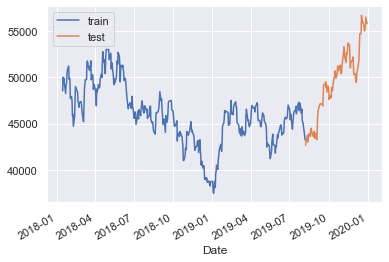

In [39]:
ax = train['Close'].plot()
test['Close'].plot(ax=ax)
plt.legend(['train', 'test'])

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 384 entries, 2018-01-15 to 2019-08-07
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   High             384 non-null    float64
 1   Low              384 non-null    float64
 2   Open             384 non-null    float64
 3   Close            384 non-null    float64
 4   Volume           384 non-null    float64
 5   var_daily_price  384 non-null    float64
 6   var_daily_ratio  384 non-null    float64
 7   dayline_10       384 non-null    float64
 8   dayline_5        384 non-null    float64
 9   chg_3            384 non-null    float64
dtypes: float64(10)
memory usage: 33.0 KB


In [41]:
train.isna().sum()

High               0
Low                0
Open               0
Close              0
Volume             0
var_daily_price    0
var_daily_ratio    0
dayline_10         0
dayline_5          0
chg_3              0
dtype: int64

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
train_scaler = scaler.transform(train)
test_scaler  = scaler.transform(test)


In [43]:
window_size = 5
xlist= []
ylist = []
for i in range(window_size, train_scaler.shape[0]):    
    xlist.append(train_scaler[i-window_size:i])
    ylist.append(train_scaler[i,3])  #Close
x_train, y_train = np.array(xlist), np.array(ylist)

In [44]:
print(x_train.shape, y_train.shape)

(379, 5, 10) (379,)


In [45]:
# ! pip install -U numpy

In [46]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
# 모델 생성
model = Sequential()
model.add(LSTM(units=10, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 10)             840       
                                                                 
 dropout (Dropout)           (None, 5, 10)             0         
                                                                 
 lstm_1 (LSTM)               (None, 10)                840       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 1,691
Trainable params: 1,691
Non-trainable params: 0
_________________________________________________________________


In [47]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
# checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
early_stop = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_split=0.2, 
                                    callbacks=[early_stop])  #, checkpoint])

Epoch 1/200
19/19 [==============================] - 4s 32ms/step - loss: 0.3075 - mse: 0.3075 - val_loss: 0.1508 - val_mse: 0.1508
Epoch 2/200
19/19 [==============================] - 0s 5ms/step - loss: 0.2006 - mse: 0.2006 - val_loss: 0.0787 - val_mse: 0.0787
Epoch 3/200
19/19 [==============================] - 0s 5ms/step - loss: 0.0970 - mse: 0.0970 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 4/200
19/19 [==============================] - 0s 5ms/step - loss: 0.0311 - mse: 0.0311 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 5/200
19/19 [==============================] - 0s 8ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 6/200
19/19 [==============================] - 0s 5ms/step - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 7/200
19/19 [==============================] - 0s 5ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 8/200
19/19 [==============================] - 0s 7ms/step - loss: 0.0187 - 

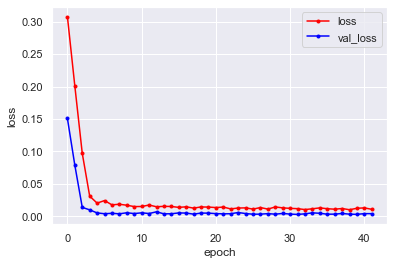

In [48]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

plt.plot(np.arange(len(y_loss)), history.history['loss'],    marker='.', c='red', label="loss")
plt.plot(np.arange(len(y_loss)), history.history['val_loss'], marker='.', c='blue', label="val_loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [49]:
test_scaler.shape

(97, 10)

In [50]:
window_size = 5
xtlist= []
ytlist = []
for i in range(window_size, test_scaler.shape[0]):    
    xtlist.append(test_scaler[i-window_size:i])
    ytlist.append(test_scaler[i,3])  #Close
x_test, y_test = np.array(xtlist), np.array(ytlist)

In [51]:
x_test.shape, y_test.shape

((92, 5, 10), (92,))

In [52]:
pred = model.predict(x_test)

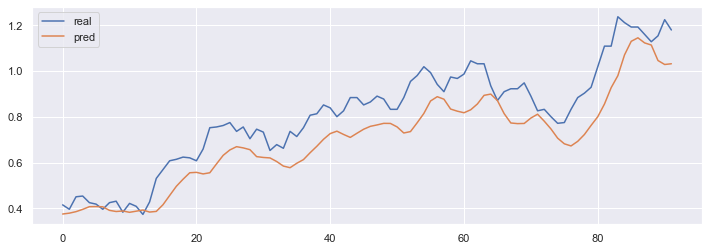

In [53]:
plt.figure(figsize=(12, 4))
plt.plot(y_test, label = 'real')
plt.plot(pred, label = 'pred')
plt.legend()
plt.show()

In [54]:
from sklearn.metrics import mean_squared_error
print('MSE : ', mean_squared_error(y_test, pred)) 


MSE :  0.015635836625575807
